In [19]:
import pandas as pd
import pyarrow.parquet as pq
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sbs

In [2]:
target = pd.read_json("niro3.json", orient='records', lines=True)
source = pd.read_json("niroSource.txt", orient='records', lines=True)

target.columns = ['EventCode', 'Date', 'Country', 'Events', 'Articles']
source.columns = ['EventCode', 'Date', 'Country', 'Events', 'Articles']

In [3]:
source.head()

,EventCode,Date,Country,Events,Articles
0,19,200705,IRQ,4100,23400
1,19,200305,SYR,52,276
2,20,200705,PAK,4,23
3,19,200604,PAK,512,1226
4,18,200605,AFG,174,472


In [4]:
target.head()

,EventCode,Date,Country,Events,Articles
0,20,200406,SYR,10,32
1,18,201105,MEX,108,466
2,19,200705,IRQ,3360,17815
3,20,200705,PAK,1,9
4,19,200305,SYR,26,104


In [5]:
def df_country(_df, country):
    return _df[_df.Country == country].drop('Country', axis=1).set_index(['Date'])

In [25]:
df = pd.concat([target, source])

df_grouped = df.groupby(['Date', 'Country']).sum().drop(['EventCode'], axis=1).sort_index(level=[0,1])

df = df_grouped.reset_index()

df['Ratio'] = df['Articles'] / df['Events'].astype('float')

df.drop(['Events', 'Articles'], axis=1, inplace=True)

irq = df_country(df, 'IRQ')
mex = df_country(df, 'MEX')
pak = df_country(df, 'PAK')
afg = df_country(df, 'AFG')
syr = df_country(df, 'SYR')

df.head()

,Date,Country,Ratio
0,200301,MEX,3.000000
1,200301,PAK,4.025822
2,200302,AFG,4.453642
3,200302,IRQ,4.048154
4,200302,MEX,5.035714


In [26]:
df_year = df.copy()

df_year['Date'] = df_year['Date'].apply(lambda d: int(d/100))

df_year = df_year.groupby(['Date', 'Country']).mean().reset_index()

irq_year = df_country(df_year, 'IRQ')
mex_year = df_country(df_year, 'MEX')
pak_year = df_country(df_year, 'PAK')
afg_year = df_country(df_year, 'AFG')
syr_year = df_country(df_year, 'SYR')

df_year.head()

,Date,Country,Ratio
0,2003,AFG,5.035443
1,2003,IRQ,5.031210
2,2003,MEX,3.991760
3,2003,PAK,4.342021
4,2003,SYR,4.420870


In [27]:
irq

,Ratio
Date,
200302,4.048154
200303,5.565340
200304,5.630435
200309,4.880911
200402,4.962013
200403,5.283837
200404,4.708837
200409,4.631663
200502,4.199153


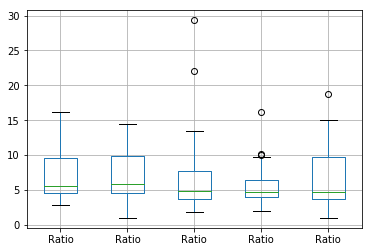

,Ratio,Ratio,Ratio,Ratio,Ratio
Date,,,,,
200301,NaN,NaN,3.000000,4.025822,NaN
200302,4.048154,4.453642,5.035714,4.149701,NaN
200303,5.565340,5.133484,3.839161,4.729258,4.375000
200304,5.630435,5.937133,NaN,NaN,4.603352
200305,NaN,NaN,NaN,NaN,4.871795
200308,NaN,NaN,3.894737,4.549080,NaN
200309,4.880911,4.617512,4.189189,4.514019,NaN
200310,NaN,NaN,NaN,NaN,3.833333
200312,NaN,NaN,NaN,4.084249,NaN


In [28]:
data  =[irq,afg,mex,pak,syr]
data = pd.concat(data, axis=1)
data.boxplot()
plt.show()

data

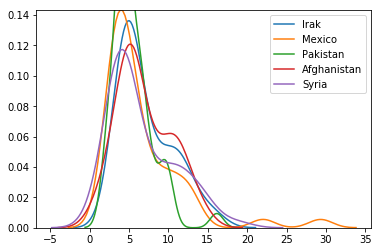

In [41]:
sbs.distplot(irq, hist=False ,label='Irak')
sbs.distplot(mex, hist=False,label='Mexico')
sbs.distplot(pak, hist=False,label='Pakistan')
sbs.distplot(afg, hist=False,label='Afghanistan')
sbs.distplot(syr , hist=False,label='Syria')


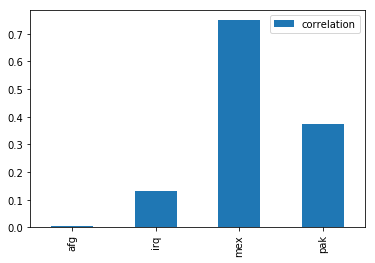

In [18]:
def load_country(country_code):
    x = pd.read_csv('deaths_'+country_code+'.csv').drop(['country'], axis=1)
    x.columns = ['Date', 'Deaths']
    #x['Deaths'] = x['Deaths'] / 1000
    return x.set_index('Date')

def normalize(_df):
    return abs(_df - _df.mean()) / _df.std()

irq = normalize(load_country('IRQ').join(irq_year))
mex = normalize(load_country('MEX').join(irq_year))
pak = normalize(load_country('PAK').join(irq_year))
afg = normalize(load_country('AFG').join(irq_year))

correlations = pd.DataFrame(abs(pd.Series({'afg' : afg.corr()['Deaths']['Ratio'], 'irq' :  irq.corr()['Deaths']['Ratio'],
                'pak' :  pak.corr()['Deaths']['Ratio'], 'mex' :  mex.corr()['Deaths']['Ratio']})))

correlations.columns = ['correlation']

correlations.plot(kind='bar')

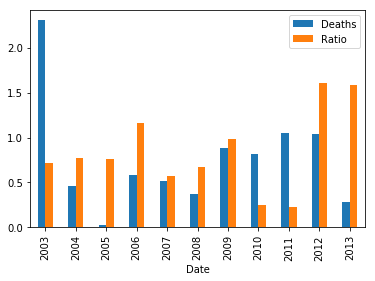

In [14]:
irq.plot(kind='bar')

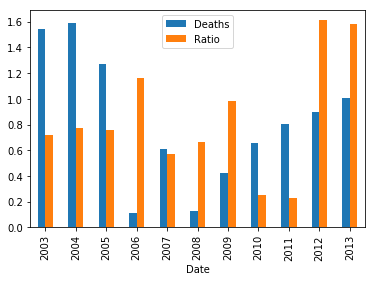

In [15]:
afg.plot(kind='bar')

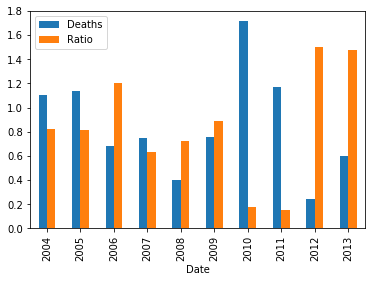

In [16]:
mex.plot(kind='bar')

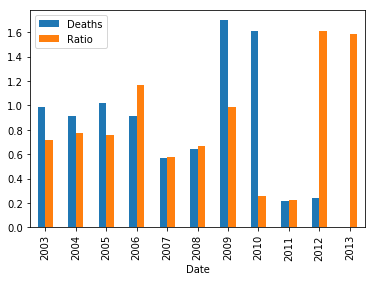

In [17]:
pak.plot(kind='bar')